In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt 

import ThinkStats2.code.thinkstats2 as thinkstats2


ModuleNotFoundError: No module named 'thinkplot'

Read Data

In [7]:
df_olympic = pd.read_csv("athlete_events.csv")
olympic = df_olympic.copy()

Dataset variable information

In [8]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


A Glimpse of data in the dataset

In [9]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Lets gets mean of numeric fields in the data set

In [12]:
olympic.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


So mean age is 25.56, mean height is 175cm and mean weight is 70 kg.

In [19]:
winners = olympic[pd.notnull(olympic['Medal'])]

In [20]:
winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


Histogram of Age of winners

Text(0.5, 1.0, 'Histogram - Age of winners')

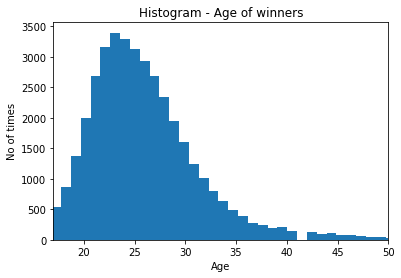

In [56]:
#winners.hist(column = 'Age', xlim)
ageHist = plt.hist(winners['Age'], bins=65)
plt.ylabel('No of times')
plt.xlim(17,50)
plt.xlabel('Age')
plt.title('Histogram - Age of winners')

Histogram of Height of winners

Text(0.5, 1.0, 'Histogram - Height of winners')

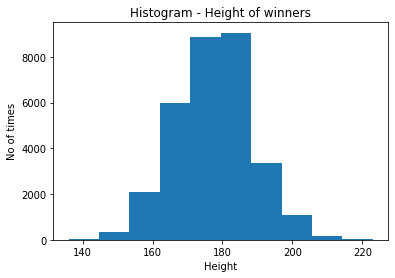

In [31]:
plt.hist(winners['Height'])
plt.ylabel('No of times')
plt.xlabel('Height')
plt.title('Histogram - Height of winners')

Histogram of Weight of winners

Text(0.5, 1.0, 'Histogram - Weight of winners')

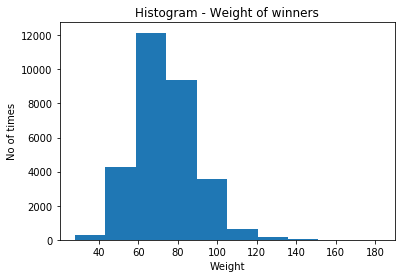

In [32]:
plt.hist(winners['Weight'])
plt.ylabel('No of times')
plt.xlabel('Weight')
plt.title('Histogram - Weight of winners')

By looking at the histograms we can identify outliers which looks obvious.
1. Looks like athlete beyond age 36 have rare chance of winning and should be considered outlier.
2. Athlete with height out side the range of (150cm to 190cm) have less chances and should be considered outlier.
3. Athlete with weight out side the range of (42kg to 120kg) have less chances and should be considered outlier.

We can remove these records to handle these exception scenarios.

Various stats about these fields can be calculate using pandas describe function

In [57]:
winners.describe()

,ID,Age,Height,Weight,Year
count,39783.000000,39051.000000,31072.000000,30456.000000,39783.000000
mean,69407.051806,25.925175,177.554197,73.770680,1973.943845
std,38849.980737,5.914026,10.893723,15.016025,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,63.000000,1952.000000
50%,68990.000000,25.000000,178.000000,73.000000,1984.000000
75%,103461.500000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


In [73]:
filtered_winners = winners[(winners['Height'] >=150) & (winners['Height'] <=190)]
filtered_winners = filtered_winners[(filtered_winners['Weight'] >=150) & (filtered_winners['Weight'] <=190)]
filtered_winners = filtered_winners[(filtered_winners['Age'] <=35)]


After removing outliers

In [74]:
filtered_winners.describe()

,ID,Age,Height,Weight,Year
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,60245.333333,26.666667,184.416667,161.500000,1987.333333
std,49306.679725,4.355422,3.502164,8.062258,16.255535
min,2511.000000,21.000000,176.000000,150.000000,1964.000000
25%,20144.000000,23.500000,183.000000,155.000000,1972.000000
50%,46014.500000,26.000000,185.000000,161.500000,1990.000000
75%,100282.000000,30.000000,186.000000,167.750000,2001.000000
max,134407.000000,34.000000,189.000000,175.000000,2008.000000


Lets see how it works out for Male vs Female.

In [84]:
filtered_winners['maleWinners'] = filtered_winners['Sex'] == 'M'

In [88]:
pmfMaleAge = thinkstats2.Pmf(filtered_winners[filtered_winners['maleWinners'] is True])

NameError: name 'thinkstats2' is not defined